Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

A real-world urban prediction problem is to predict the influence of construction works on the noise compliants from surrounding areas. In this case, we care about not only the prediction results of the influence but also the factors that derive these results, like what would be the limit of working hours of construction works, so that the governors can make decisions wisely. So, in this case, both the interpretability and the results are essential, and it might be preferable to use decision tree rather than random forests.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

A real-world urban prediction problem is to predict the price of local real estates. In this case, the accuracy of the results are essential, while the interpretability is not that important, since the factors like season and the locations of the houses can not be influenced by the actions of the government. Thus, it might be preferable to use random forests rather than decision tree.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

We could setting some interpretability out of the model by calculating the variable importance, including:
1. Accurancy-based importance: First, measure the prediction accuracy on the out-of-bag sample. Then, the values of the variable in the out-of-bag-sample are randomly shuffled, keeping all other variables the same. Finally, the decrease in prediction accuracy on the shuffled data is measured to represent the importance of the variable.
2. Gini-based importance: When a tree is built, the decision about which variable to split at each node uses a calculation of the Gini impurity. For each variable, the sum of the Gini decrease across every tree of the forest is accumulated every time that variable is chosen to split a node. The sum is divided by the number of trees in the forest to give an average, which indicates the importance of the variable.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [3]:
from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [13]:
most_commmon = df['MPG'].value_counts().idxmax()
most_commmon

'bad'

In [14]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [94]:
def split_discrete(df):
    rule = []
    info_gain = []

    for i in ['cylinders', 'weight']:
        for j in df[i].unique():
            goodY = sum(df[df[i]==j].MPG=='good')      
            badY = sum(df[df[i]==j].MPG=='bad')
            goodN = sum(df[df[i]!=j].MPG=='good')
            badN = sum(df[df[i]!=j].MPG=='bad')
        
            rule.append([i,j])
            info_gain.append(InformationGain(goodY,badY,goodN,badN))

    split = pd.DataFrame(rule, columns=['attribute','value']) 
    split['info_gain'] = info_gain
    return split

split_discrete(df)

,attribute,value,info_gain
0,cylinders,4,0.365294
1,cylinders,6,0.153078
2,cylinders,8,0.122556
3,weight,light,0.097107
4,weight,medium,0.000000
5,weight,weighty,0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [109]:
def split_real(df):
    rule_hp = []
    info_gain_hp = []

    hp = df['HP'].unique()
    hp_mid = list((hp[1:] + hp[:-1]) / 2)

    for i in hp_mid:
        goodY = sum(df[df['HP']>i].MPG=='good')      
        badY = sum(df[df['HP']>i].MPG=='bad')
        goodN = sum(df[df['HP']<=i].MPG=='good')
        badN = sum(df[df['HP']<=i].MPG=='bad')
    
        rule_hp.append(i)
        info_gain_hp.append(InformationGain(goodY,badY,goodN,badN))

    split_hp = pd.DataFrame(rule_hp,columns=['if_HP_value_larger_than'])
    split_hp['info_gain'] = info_gain_hp
    return split_hp

split_real(df)

,if_HP_value_larger_than,info_gain
0,82.5,0.367103
1,100.0,0.153078
2,142.5,0.094448
3,135.0,0.122556
4,94.5,0.365294
5,116.5,0.122556
6,164.5,0.068394
7,167.5,0.068394
8,122.5,0.122556
9,96.0,0.223357


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

In [110]:
i = 83
countY = df[df['HP']>i].MPG.value_counts()      
countN = df[df['HP']<=i].MPG.value_counts()
print(countY)
print(countN)

bad     15
good     2
Name: MPG, dtype: int64
good    3
Name: MPG, dtype: int64


Based on the results above, we get the maximum information gain when split the data by HP > 83, which is the optimal binary split. Of the two child nodes created by the split, 'Y'(HP>83) would require further partitioning, since both 'good' and 'bad' item exists in the subset.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [111]:
#split by HP>83, Y
df_1 = df[df['HP']>83]
print(split_discrete(df_1))
print(split_real(df_1))

   attribute    value  info_gain
0  cylinders        6   0.079946
1  cylinders        4   0.198455
2  cylinders        8   0.063720
3     weight   medium   0.140781
4     weight  weighty   0.079946
5     weight    light   0.035299
    if_HP_value_larger_than  info_gain
0                     100.0   0.079946
1                     142.5   0.048914
2                     135.0   0.063720
3                      94.5   0.198455
4                     116.5   0.063720
5                     164.5   0.035299
6                     167.5   0.035299
7                     122.5   0.063720
8                      96.0   0.117981
9                     131.0   0.063720
10                    129.5   0.063720
11                     87.0   0.010969
12                     89.0   0.093125


In [112]:
#choose cylinders=4 as the rule
i = 4
countY = df_1[df_1['cylinders']==i].MPG.value_counts()      
countN = df_1[df_1['cylinders']!=i].MPG.value_counts()
print(countY)
print(countN)

bad     4
good    2
Name: MPG, dtype: int64
bad    11
Name: MPG, dtype: int64


In [113]:
#split by HP>83, Y; cylinders=4, Y
df_2 = df_1[df_1['cylinders']==4]
print(split_discrete(df_2))
print(split_real(df_2))

   attribute   value  info_gain
0  cylinders       4   0.000000
1     weight  medium   0.459148
2     weight   light   0.459148
   if_HP_value_larger_than  info_gain
0                    102.0   0.109170
1                     94.5   0.251629
2                     93.5   0.459148
3                     90.5   0.316689
4                     91.0   0.316689


In [114]:
#choose weight='light' as the rule
i = 'light'
countY = df_2[df_2['weight']==i].MPG.value_counts()      
countN = df_2[df_2['weight']!=i].MPG.value_counts()
print(countY)
print(countN)

bad    3
Name: MPG, dtype: int64
good    2
bad     1
Name: MPG, dtype: int64


In [118]:
#split by HP>83, Y; cylinders=4, Y; weight='light', N
df_3 = df_2[df_2['weight']!='light']
print(split_discrete(df_3))
print(split_real(df_3))

   attribute   value  info_gain
0  cylinders       4        0.0
1     weight  medium        0.0
   if_HP_value_larger_than  info_gain
0                    101.0   0.918296
1                     90.5   0.251629


In [119]:
#choose hp>101 as the rule
i = 101
countY = df_3[df_3['HP']>i].MPG.value_counts()      
countN = df_3[df_3['HP']<=i].MPG.value_counts()
print(countY)
print(countN)

bad    1
Name: MPG, dtype: int64
good    2
Name: MPG, dtype: int64


The data points are perfectly classified.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

**HP>83?**
* N(good:3, bad:0)
* Y(good:2, bad:15)
> **cylinders==4?**
>* N(good:0, bad:11)
>* Y(good:2, bad:4)
>> **weight=='light'?**
>>* Y(good:0, bad:3)
>>* N(good:2, bad:1)
>>> **HP>101?**
>>>* Y(good:0, bad:1)
>>>* N(good:2, bad:0)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,4,70,light

?,6,113,medium

?,6,83,weighty

?,4,95,weighty


According to the tree structure learned in f, the classification result for theses vehicles should be good, bad, good, good respectively.

### Question 3, Predicting burden of disease （40 pts)

In [121]:
data = pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# remove records with any missing values
data = data.dropna()

# Let's take "BurdenOfDisease" as the target variable. 
y = data.loc[:,"BurdenOfDisease"]

# Get the feature space.  We are using all other variables (except country name) as features.
X = data.loc[:,"FrxnPeaceIn10":"BurdenOfDisease"]
X = pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [139]:
OS = []
for i in range(1,11):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

<module 'matplotlib.pylab' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pylab.py'>

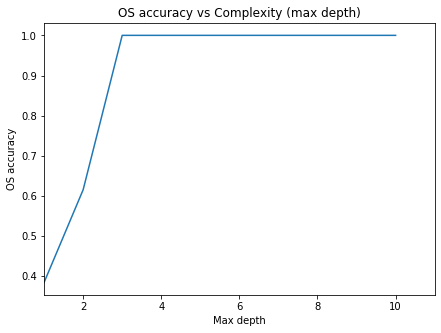

In [141]:
import matplotlib.pylab as plt

plt.figure(figsize=(7,5))
plt.plot(range(1,11),OS)
plt.xlabel("Max depth")
plt.ylabel("OS accuracy")
plt.title("OS accuracy vs Complexity (max depth)")
plt.xlim(1,11)
plt

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,11)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs = gr.fit(X_train,y_train)
print(rs.best_params_)

dt = DecisionTreeClassifier(max_depth=list(rs.best_params_.values())[0])
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))

{'max_depth': 3}
1.0


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

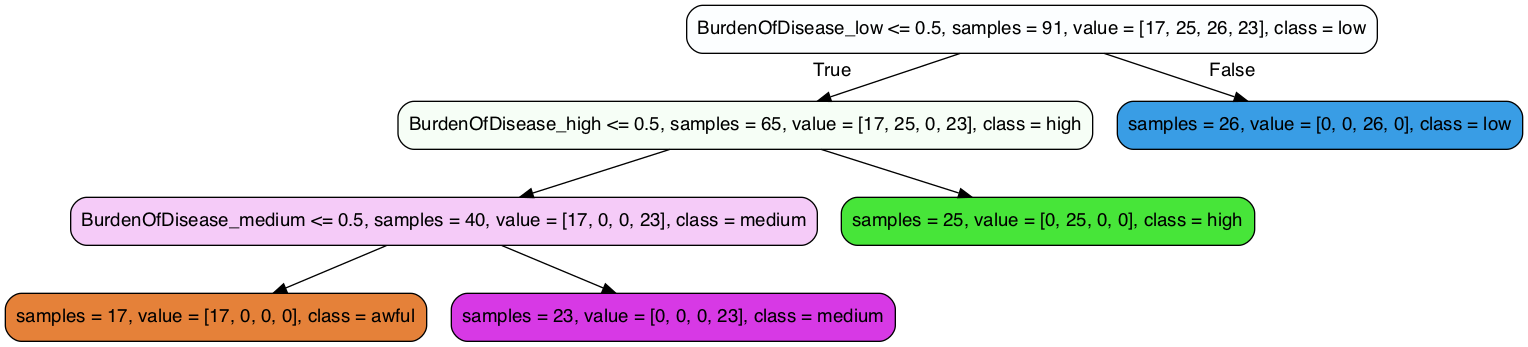

In [161]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

thestring = tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes':range(2,11)}
rf = RandomForestClassifier()
gr = GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs = gr.fit(X_train,y_train)
print(rs.best_params_)

rf = RandomForestClassifier(max_leaf_nodes=list(rs.best_params_.values())[0])
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

{'max_leaf_nodes': 3}
1.0


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

With GridSearchCV being used to tune the hyper-parameters, the accuracy of ramdom forest is usually better than decision tree, while in this case, as is shown above, the accuracy of these two model is similar. As for interpretability, the decision tree model can be interpreted more clearly by graph, as is shown in Q3.d)., while random forest is more like a 'black box'.